# Working sheet
## 09 - Negative binomial regression - Coding of categorical variables
V09.01.00 - 2024-02-26

## Load data
Change the path and the filename in the following box.

In [52]:
library(readr)
df <- read_csv("data/debtrivedi.csv",
                 show_col_types = FALSE)
df$poorhlth <- ifelse(df$health == "poor", 1, 0)
df$exclhlth <- ifelse(df$health == "excellent", 1, 0)
df$male <- ifelse(df$gender == "male", 1, 0)
df$privins_n <- ifelse(df$privins == "yes", 1, 0)


Look at the structure and the head of the dataset.

In [53]:
str(df)

spc_tbl_ [4,406 × 23] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ofp      : num [1:4406] 5 1 13 16 3 17 9 3 1 0 ...
 $ ofnp     : num [1:4406] 0 0 0 0 0 0 0 0 0 0 ...
 $ opp      : num [1:4406] 0 2 0 5 0 0 0 0 0 0 ...
 $ opnp     : num [1:4406] 0 0 0 0 0 0 0 0 0 0 ...
 $ emer     : num [1:4406] 0 2 3 1 0 0 0 0 0 0 ...
 $ hosp     : num [1:4406] 1 0 3 1 0 0 0 0 0 0 ...
 $ health   : chr [1:4406] "average" "average" "poor" "poor" ...
 $ numchron : num [1:4406] 2 2 4 2 2 5 0 0 0 0 ...
 $ adldiff  : chr [1:4406] "no" "no" "yes" "yes" ...
 $ region   : chr [1:4406] "other" "other" "other" "other" ...
 $ age      : num [1:4406] 6.9 7.4 6.6 7.6 7.9 6.6 7.5 8.7 7.3 7.8 ...
 $ black    : chr [1:4406] "yes" "no" "yes" "no" ...
 $ gender   : chr [1:4406] "male" "female" "female" "male" ...
 $ married  : chr [1:4406] "yes" "yes" "no" "yes" ...
 $ school   : num [1:4406] 6 10 10 3 6 7 8 8 8 8 ...
 $ faminc   : num [1:4406] 2.881 2.748 0.653 0.659 0.659 ...
 $ employed : chr [1:4406] "yes" "no" "no"

In [54]:
head(df)

ofp,ofnp,opp,opnp,emer,hosp,health,numchron,adldiff,region,⋯,married,school,faminc,employed,privins,medicaid,poorhlth,exclhlth,male,privins_n
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
5,0,0,0,0,1,average,2,no,other,⋯,yes,6,2.8810,yes,yes,no,0,0,1,1
1,0,2,0,2,0,average,2,no,other,⋯,yes,10,2.7478,no,yes,no,0,0,0,1
13,0,0,0,3,3,poor,4,yes,other,⋯,no,10,0.6532,no,no,yes,1,0,0,0
16,0,5,0,1,1,poor,2,yes,other,⋯,yes,3,0.6588,no,yes,no,1,0,1,1
3,0,0,0,0,0,average,2,yes,other,⋯,yes,6,0.6588,no,yes,no,0,0,0,1
17,0,0,0,0,0,poor,5,yes,other,⋯,no,7,0.3301,no,no,yes,1,0,0,0


In [55]:
summary(df)

      ofp              ofnp              opp                opnp         
 Min.   : 0.000   Min.   :  0.000   Min.   :  0.0000   Min.   :  0.0000  
 1st Qu.: 1.000   1st Qu.:  0.000   1st Qu.:  0.0000   1st Qu.:  0.0000  
 Median : 4.000   Median :  0.000   Median :  0.0000   Median :  0.0000  
 Mean   : 5.774   Mean   :  1.618   Mean   :  0.7508   Mean   :  0.5361  
 3rd Qu.: 8.000   3rd Qu.:  1.000   3rd Qu.:  0.0000   3rd Qu.:  0.0000  
 Max.   :89.000   Max.   :104.000   Max.   :141.0000   Max.   :155.0000  
      emer              hosp          health             numchron    
 Min.   : 0.0000   Min.   :0.000   Length:4406        Min.   :0.000  
 1st Qu.: 0.0000   1st Qu.:0.000   Class :character   1st Qu.:1.000  
 Median : 0.0000   Median :0.000   Mode  :character   Median :1.000  
 Mean   : 0.2635   Mean   :0.296                      Mean   :1.542  
 3rd Qu.: 0.0000   3rd Qu.:0.000                      3rd Qu.:2.000  
 Max.   :12.0000   Max.   :8.000                      Max.   :

In [56]:
library(Hmisc)
describe(df)

df 

 23  Variables      4406  Observations
--------------------------------------------------------------------------------
ofp 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4406        0       60    0.992    5.774    6.227        0        0 
     .25      .50      .75      .90      .95 
       1        4        8       13       17 

lowest :  0  1  2  3  4, highest: 63 65 66 68 89
--------------------------------------------------------------------------------
ofnp 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4406        0       51    0.681    1.618    2.829        0        0 
     .25      .50      .75      .90      .95 
       0        0        1        4        8 

lowest :   0   1   2   3   4, highest:  66  71  77  78 104
--------------------------------------------------------------------------------
opp 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4406        0       37     0.54   

Plot the variables of interest with a scatter plot matrix from package GGally.


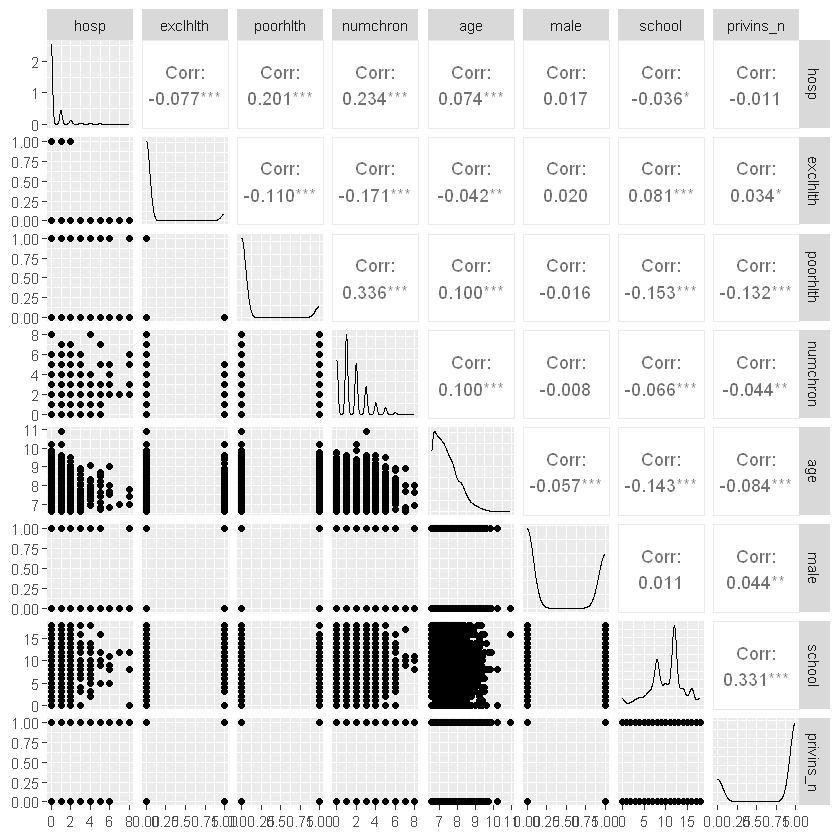

In [57]:
library(GGally)
library(tidyverse)
df1 <- df %>% dplyr::select(hosp, exclhlth, poorhlth, numchron, age, male, school, privins_n)
ggpairs(df1)


## Assumptions of negative binomial regression

- Linearity in model parameters
- Independence of individual observations
- Multiplicative effects of independence variables
- Conditional variance of the outcome variable might be greater than its conditional mean 
- Underdispersion is not handled by the model (conditional variance is smaller than the conditional mean).


TODO: Check completeness of the assumptions and add example code for the checks.

## Coding of categorical variables

- health
- gender
- privins

If using character variables, the first level of the alphabetic sort order will be regardes as reference level.

For some functions the character variable has to be converted to a factor, e.g., for the contrasts() fucntion


In [58]:
table(df$health)
table(df$gender)
table(df$privins)


  average excellent      poor 
     3509       343       554 


female   male 
  2628   1778 


  no  yes 
 985 3421 

In [59]:
contrasts(as.factor(df$health))
contrasts(as.factor(df$gender))
contrasts(as.factor(df$privins))

,excellent,poor
average,0,0
excellent,1,0
poor,0,1


,male
female,0
male,1


,yes
no,0
yes,1


Dummy coding is the default coding.

## Fit the model


In [60]:
library(MASS)
library(broom)
my_glm <- glm.nb(hosp ~ health + numchron + age + gender + school + privins, data = df)

## Summary of the model

In [61]:
summary(my_glm)


Call:
glm.nb(formula = hosp ~ health + numchron + age + gender + school + 
    privins, data = df, init.theta = 0.5660185253, link = log)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.752640   0.441908  -8.492  < 2e-16 ***
healthexcellent -0.697875   0.193151  -3.613 0.000303 ***
healthpoor       0.613926   0.095217   6.448 1.14e-10 ***
numchron         0.289418   0.025414  11.388  < 2e-16 ***
age              0.238444   0.054835   4.348 1.37e-05 ***
gendermale       0.153862   0.072648   2.118 0.034181 *  
school          -0.002271   0.010192  -0.223 0.823643    
privinsyes       0.093922   0.090425   1.039 0.298957    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for Negative Binomial(0.566) family taken to be 1)

    Null deviance: 2879.7  on 4405  degrees of freedom
Residual deviance: 2547.9  on 4398  degrees of freedom
AIC: 5731.1

Number of Fisher Scoring iterations: 1


              Thet

## Estimates

In [62]:
tidy(my_glm)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.752639734,0.44190797,-8.4919032,2.032803e-17
healthexcellent,-0.697874635,0.19315090,-3.6131058,3.025512e-04
healthpoor,0.613926301,0.09521661,6.4476805,1.135749e-10
numchron,0.289418299,0.02541425,11.3880328,4.796974e-30
age,0.238444463,0.05483476,4.3484178,1.371232e-05
gendermale,0.153862333,0.07264766,2.1179256,3.418137e-02
school,-0.002271456,0.01019223,-0.2228615,8.236433e-01
privinsyes,0.093922247,0.09042523,1.0386730,2.989568e-01


## Model

In [63]:
glance(my_glm)

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<int>,<logLik>,<dbl>,<dbl>,<dbl>,<int>,<int>
2879.693,4405,-2856.562,5731.125,5788.641,2547.901,4398,4406


## Residuals

Handle with care because the negative binomial regression is not yet handled by the augment() function.

In [64]:
augment(my_glm) %>% head()

hosp,health,numchron,age,gender,school,privins,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,average,2,6.9,male,6,yes,-1.2943805,0.7988543,0.0013302064,0.7611296,2.159866e-04,0.7993861
0,average,2,7.4,female,10,yes,-1.3381064,-0.6565853,0.0005691332,0.7611606,1.276725e-05,-0.6567722
3,poor,4,6.6,female,10,no,-0.4300213,1.2253887,0.0044343560,0.7609997,2.208121e-03,1.2281146
1,poor,2,7.6,male,3,yes,-0.5067287,0.3103212,0.0040982203,0.7612106,6.563042e-05,0.3109590
0,average,2,7.9,female,6,yes,-1.2097984,-0.6922080,0.0011475285,0.7611534,2.808279e-05,-0.6926056
0,poor,5,6.6,female,7,no,-0.1337887,-1.0284394,0.0055505315,0.7610661,2.411040e-04,-1.0313055


Only the first rows are displayed.